In [24]:
from collections import Counter
import math
import pandas as pd


In [ ]:
!wget https://raw.githubusercontent.com/iff5sigma/statisticsML/main/Classification/AdultIncome.csv 

In [25]:
# Funzione per generare la sequenza di Fibonacci fino all'n-esimo termine
# Si tratta di un algoritmo ricorsivo
def fibonacci(n):
    fib_sequence = []
    for i in range(n):
        if i <= 1:
            fib_sequence.append(i)
        else:
            fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
    print(fib_sequence)
    return fib_sequence

fibonacci(20)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181]

In [26]:
def first_digit(num):
    while num >= 10:
        num //= 10
    return num

In [27]:
N = 500
fib_sequence = fibonacci(N)
# Estrai le prime cifre e conta le loro frequenze
first_digits = [first_digit(num) for num in fib_sequence]
total_digits = len(first_digits)
digit_counts = Counter(first_digits)

# Calcola le percentuali delle prime cifre
digit_percentages = {digit: count / total_digits * 100 for digit, count in digit_counts.items()}

# Stampare le percentuali delle prime cifre
print('-------------------- BENFORD FIBONACCI --------------------')
for digit, percentage in sorted(digit_percentages.items()):
    print("Numero:", digit, "- Percentuale:", percentage, '%')

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 679891637638612258, 110008777

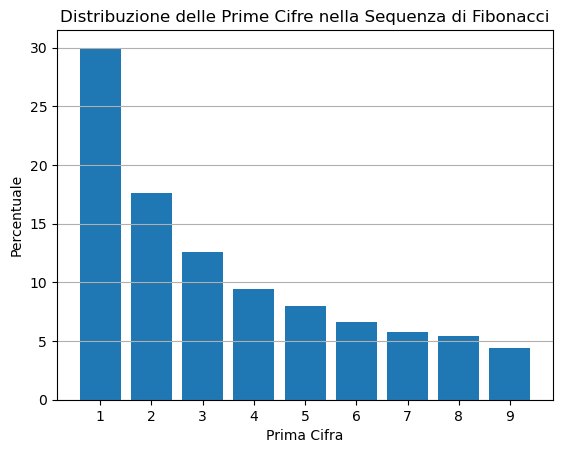

In [28]:
# grafico 
import matplotlib.pyplot as plt

# Creazione del grafico
digits = sorted(digit_percentages.keys())
digits.remove(0)
percentages = [digit_percentages[digit] for digit in digits]

plt.bar(digits, percentages, tick_label=digits)
plt.xlabel('Prima Cifra')
plt.ylabel('Percentuale')
plt.title('Distribuzione delle Prime Cifre nella Sequenza di Fibonacci')
plt.grid(axis='y')
plt.show()


In [29]:
def benfords_law(data):
    # Estrai la prima cifra da ogni numero
    first_digits = [first_digit(num) for num in data]
    
    # Calcola la frequenza delle prime cifre
    digit_counts = Counter(first_digits)
    
    # Calcola la probabilità secondo la legge di Benford
    benford_probs = [math.log10(1 + 1/digit) for digit in range(1, 10)]
    
    # Calcola la probabilità osservata dalle prime cifre
    observed_probs = [digit_counts[digit] / len(data) for digit in range(1, 10)]
    
    # Calcola il chi-square
    chi_square = sum([(observed_probs[i] - benford_probs[i])**2 / benford_probs[i] for i in range(9)])
    
    return chi_square

In [30]:
chi_square_statistic = benfords_law(fib_sequence)
print("Chi-square statistic:", chi_square_statistic)


Chi-square statistic: 0.0003478371188838554
